<a href="https://colab.research.google.com/github/Lakshya937/aiml/blob/main/AIML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/Lakshya937/aiml/main/student-mat.csv'
df = pd.read_csv(url)


In [2]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# Separate the target variable (assuming 'target' is your target column)
data= df.copy()
# Calculate Pearson's correlation coefficients
correlation_matrix = np.abs(data.corr())
# Set a correlation threshold
correlation_threshold = 0.1
# Select features with correlation above the threshold to 'injured'
selected_features = correlation_matrix['age'][correlation_matrix['age'] > correlation_threshold]
# Filter the dataset to keep only the selected features
X_filtered = data[selected_features.index]
# Print the selected features
print("Selected Features:")
print(selected_features.index)

Selected Features:
Index(['age', 'Medu', 'Fedu', 'failures', 'goout', 'Dalc', 'Walc', 'absences',
       'G2', 'G3'],
      dtype='object')


<ipython-input-3-94bca1d99403>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = np.abs(data.corr())


Pearson's correlation coefficient is a statistical measure used to quantify the linear relationship between two continuous variables. In the context of feature selection, Pearson's correlation coefficient can be used to assess the relationship between each feature and the target variable in a regression or classification problem. It helps identify which features have the strongest linear correlation with the target variable.

CHI SQUARED (CATEGORICAL ATTRIBUTES)

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/Lakshya937/aiml/main/student-mat.csv')
df = df[['school','age','health','freetime','G1','G2','G3']]
# fill null values
for col in df.columns:
  df[col]= df[col].fillna([col].mode()[0])
df.head()


,school,age,health,freetime,G1,G2,G3
0,GP,18,3,3,5,6,6
1,GP,17,3,3,5,5,6
2,GP,15,3,3,7,8,10
3,GP,15,5,2,15,14,15
4,GP,16,5,3,6,10,10


In [32]:
#label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()


,school,age,health,freetime,G1,G2,G3
0,0,3,2,2,2,3,3
1,0,2,2,2,2,2,3
2,0,0,2,2,4,5,7
3,0,0,4,1,12,11,12
4,0,1,4,2,3,7,7


In [33]:
from sklearn.feature_selection import chi2
x = df.drop(columns=['age'], axis=1)
y = df['G1']

In [34]:
chi_square = chi2(x,y)

In [36]:
chi_square

(array([  9.82721344,  14.16979187,   3.72753346, 548.8425096 ,
        487.2883723 , 588.74279804]),
 array([8.75494441e-001, 5.86066262e-001, 9.99298093e-001, 1.57774439e-106,
        1.60008346e-093, 5.57673541e-115]))

<Axes: >

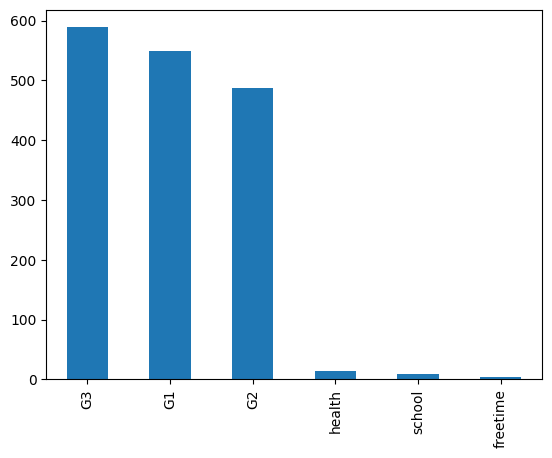

In [38]:
chi_values = pd.Series(chi_square[0],index=x.columns)
chi_values.sort_values(ascending= False, inplace= True)
chi_values.plot.bar()